In [2]:
import pandas as pd

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords
nltk.download("stopwords", quiet=True)
stop_words = set(stopwords.words("indonesian") + stopwords.words("english"))

# Load dataset and drop rows with missing fields
hoax_df = pd.read_csv("hoax_news.csv")
hoax_df.dropna(subset=["Narasi", "Penjelasan"], inplace=True)

# Tokenization function (remove punctuation, lowercase, strip stopwords)
def tokenize(text):
    text = str(text).lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = text.split()
    return [w for w in tokens if w.isalpha() and w not in stop_words]

# Apply tokenization
hoax_df["narasi_tokens"] = hoax_df["Narasi"].apply(tokenize)
hoax_df["penjelasan_tokens"] = hoax_df["Penjelasan"].apply(tokenize)

# Compute word counts after stopword removal
hoax_df["narasi_word_count"] = hoax_df["narasi_tokens"].apply(len)
hoax_df["penjelasan_word_count"] = hoax_df["penjelasan_tokens"].apply(len)

# Display descriptive statistics
print("Narasi word count stats:")
print(hoax_df["narasi_word_count"].describe(), "\n")
print("Penjelasan word count stats:")
print(hoax_df["penjelasan_word_count"].describe())


Narasi word count stats:
count    5379.000000
mean       27.682283
std        36.011914
min         0.000000
25%         8.000000
50%        17.000000
75%        33.000000
max       733.000000
Name: narasi_word_count, dtype: float64 

Penjelasan word count stats:
count    5379.000000
mean      119.924521
std        78.989070
min         4.000000
25%        78.000000
50%       100.000000
75%       137.000000
max      1779.000000
Name: penjelasan_word_count, dtype: float64


In [3]:
df = pd.read_csv("detik_news.csv")
print(len(df))

6417


Total articles: 6417
Index(['page', 'title', 'url', 'content'], dtype='object')

Null values per column:
page       0
title      0
url        0
content    5
dtype: int64

After dropping missing rows: 6412
Duplicate content entries: 32

Content length stats:
 count    6380.000000
mean      336.631191
std       194.983341
min        16.000000
25%       216.000000
50%       288.500000
75%       392.000000
max      4003.000000
Name: content_length, dtype: float64


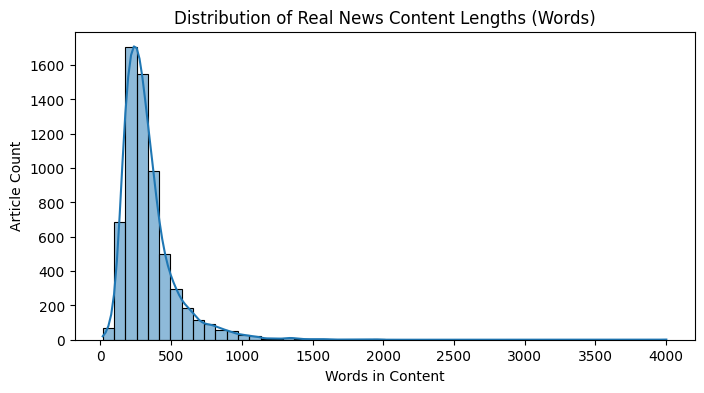

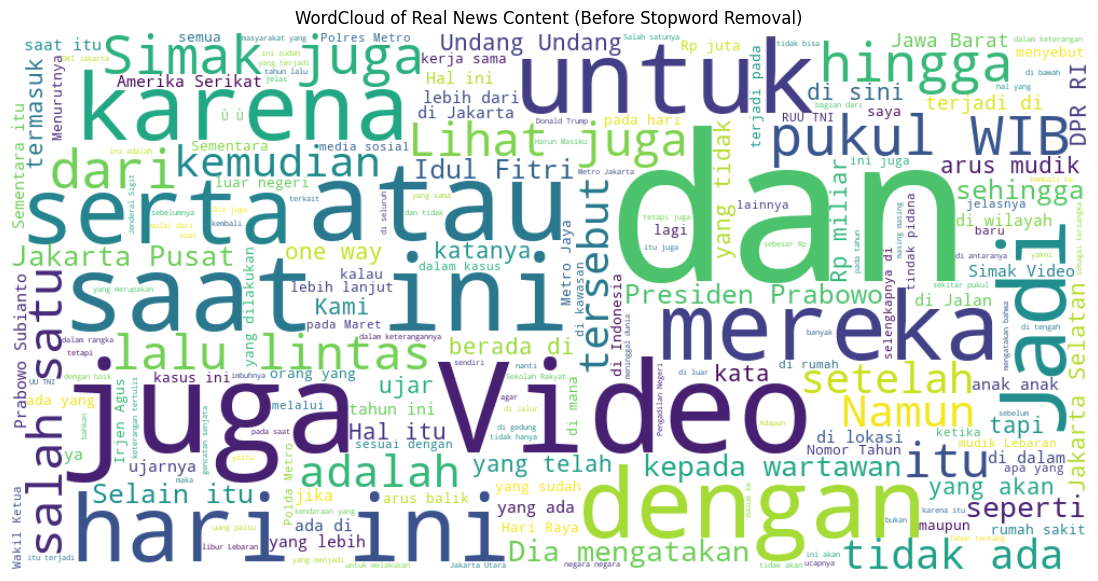

[nltk_data] Downloading package stopwords to C:\Users\WILLIAM S
[nltk_data]     L\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


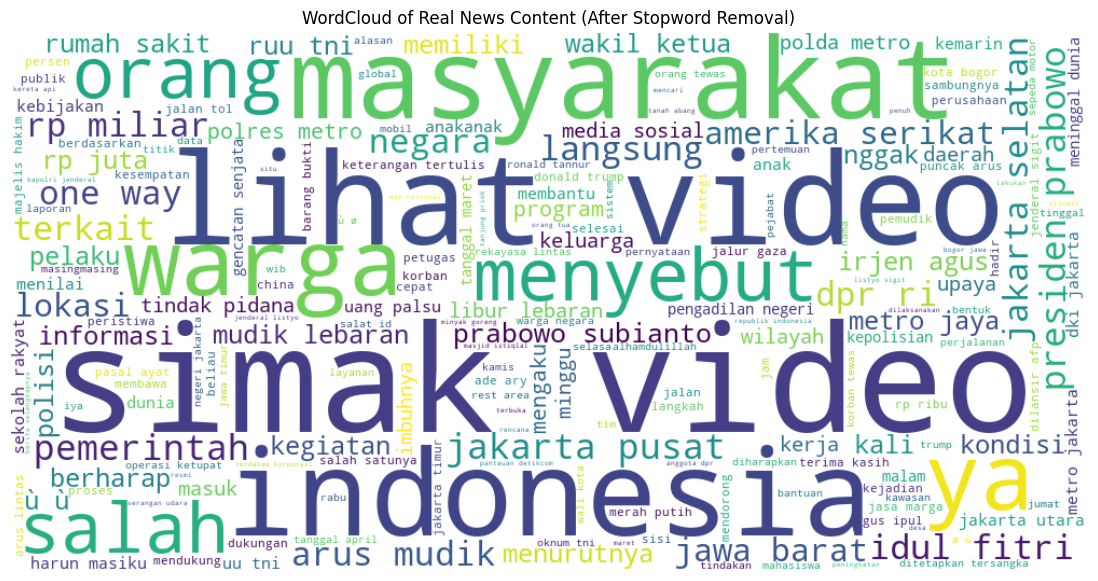

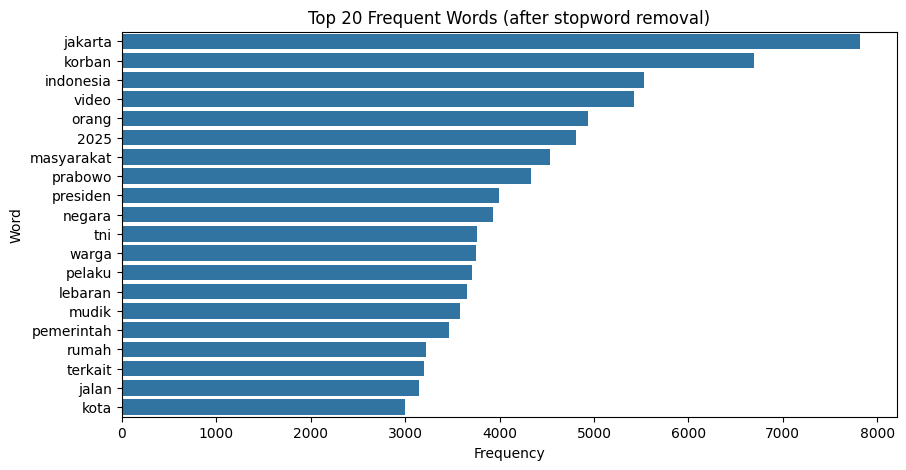


Outlier bounds: <-48.00 or >656.00
Number of outlier articles: 400


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter

# Load data
df = pd.read_csv("detik_news.csv")
print("Total articles:", len(df))
print(df.columns)

# Basic structure
print("\nNull values per column:")
print(df.isna().sum())

# Drop rows with missing content or title
df.dropna(subset=['title', 'content'], inplace=True)
print("\nAfter dropping missing rows:", len(df))

# Remove duplicates
print("Duplicate content entries:", df.duplicated("content").sum())
df.drop_duplicates(subset="content", inplace=True)

# Calculate content & title length
df["content_length"] = df["content"].apply(lambda x: len(x.split()))
df["title_length"] = df["title"].apply(lambda x: len(x.split()))

# Summary stats
print("\nContent length stats:\n", df["content_length"].describe())

# Plot content length distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["content_length"], bins=50, kde=True)
plt.title("Distribution of Real News Content Lengths (Words)")
plt.xlabel("Words in Content")
plt.ylabel("Article Count")
plt.show()

# Wordcloud (before stopword removal)
text_corpus = " ".join(df["content"].tolist())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text_corpus)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Real News Content (Before Stopword Removal)")
plt.show()

nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Tokenize and remove stopwords + punctuation
def tokenize(text):
    tokens = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return [t for t in tokens if t not in stop_words]

df["tokens"] = df["content"].apply(tokenize)

# Create wordcloud after stopword removal
filtered_text = " ".join([" ".join(tokens) for tokens in df["tokens"]])
wordcloud_filtered = WordCloud(width=1000, height=500, background_color='white').generate(filtered_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Real News Content (After Stopword Removal)")
plt.show()

# Top 20 frequent words after stopword removal
all_tokens = [token for sublist in df["tokens"] for token in sublist]
token_freq = Counter(all_tokens).most_common(20)

words, counts = zip(*token_freq)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 Frequent Words (after stopword removal)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# Detect outliers using IQR method
Q1 = df["content_length"].quantile(0.25)
Q3 = df["content_length"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["content_length"] < lower_bound) | (df["content_length"] > upper_bound)]
print(f"\nOutlier bounds: <{lower_bound:.2f} or >{upper_bound:.2f}")
print(f"Number of outlier articles: {len(outliers)}")


[nltk_data] Downloading package stopwords to C:\Users\WILLIAM S
[nltk_data]     L\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
d:\Anaconda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


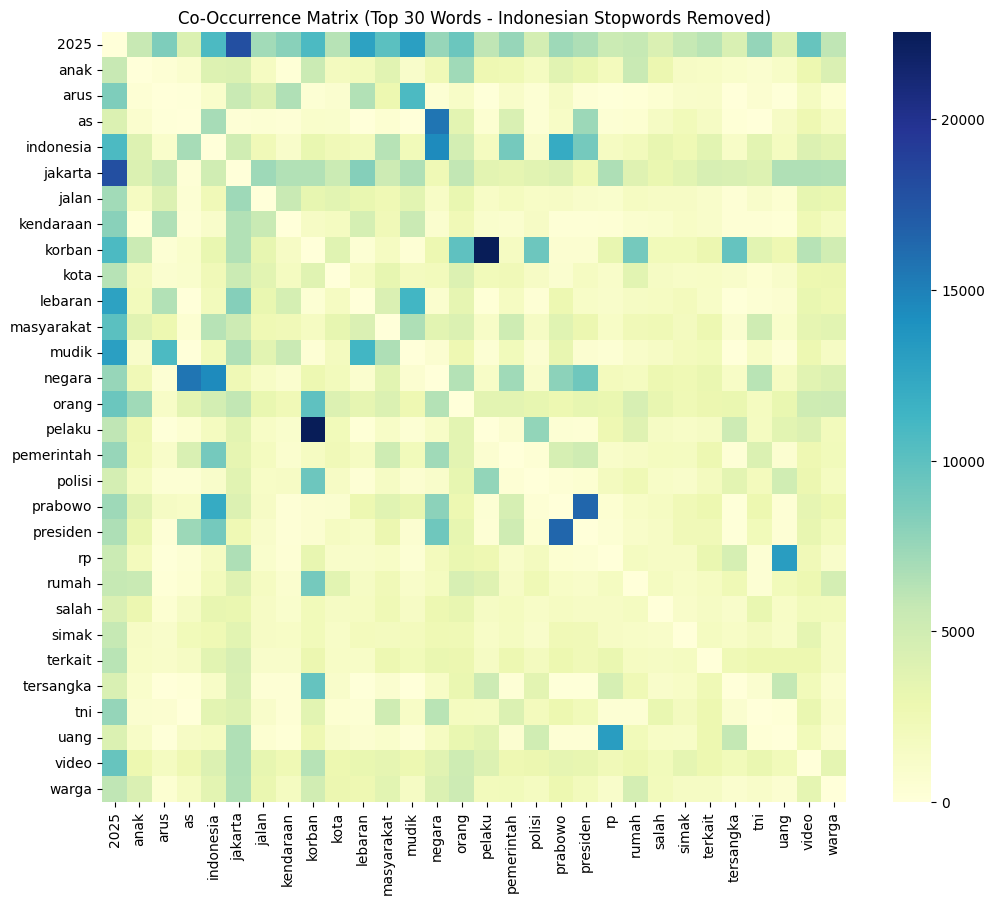

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

import nltk
nltk.download("stopwords")
stop_words = stopwords.words("indonesian")

vectorizer = CountVectorizer(max_features=30, stop_words=stop_words)

# Fit and transform
X = vectorizer.fit_transform(df["content"])

# Compute co-occurrence matrix
Xc = (X.T @ X)
Xc.setdiag(0)

# Convert to DataFrame
co_occurrence_df = pd.DataFrame(Xc.toarray(), index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

plt.figure(figsize=(12,10))
sns.heatmap(co_occurrence_df, cmap="YlGnBu")
plt.title("Co-Occurrence Matrix (Top 30 Words - Indonesian Stopwords Removed)")
plt.show()


d:\Anaconda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


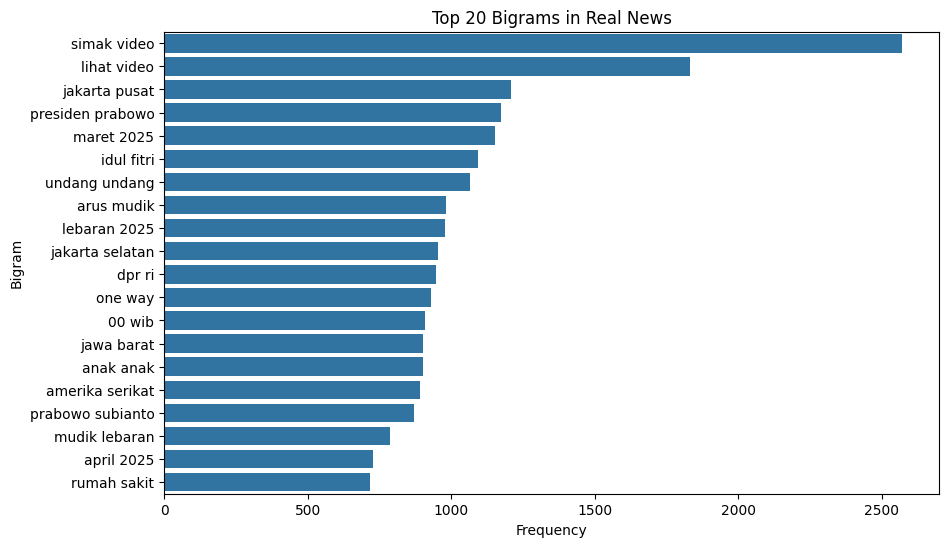

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
X2 = bigram_vectorizer.fit_transform(df["content"])
bigrams = bigram_vectorizer.get_feature_names_out()
bigram_freq = X2.sum(axis=0).A1
top_bigrams = sorted(zip(bigrams, bigram_freq), key=lambda x: x[1], reverse=True)[:20]

labels, counts = zip(*top_bigrams)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(labels))
plt.title("Top 20 Bigrams in Real News")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


d:\Anaconda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


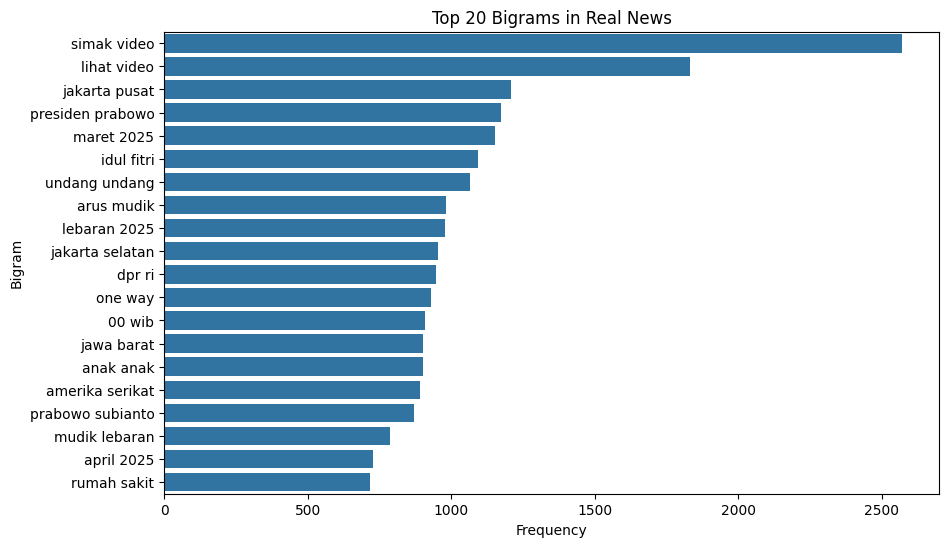

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
X2 = bigram_vectorizer.fit_transform(df["content"])
bigrams = bigram_vectorizer.get_feature_names_out()
bigram_freq = X2.sum(axis=0).A1
top_bigrams = sorted(zip(bigrams, bigram_freq), key=lambda x: x[1], reverse=True)[:20]

labels, counts = zip(*top_bigrams)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(labels))
plt.title("Top 20 Bigrams in Real News")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


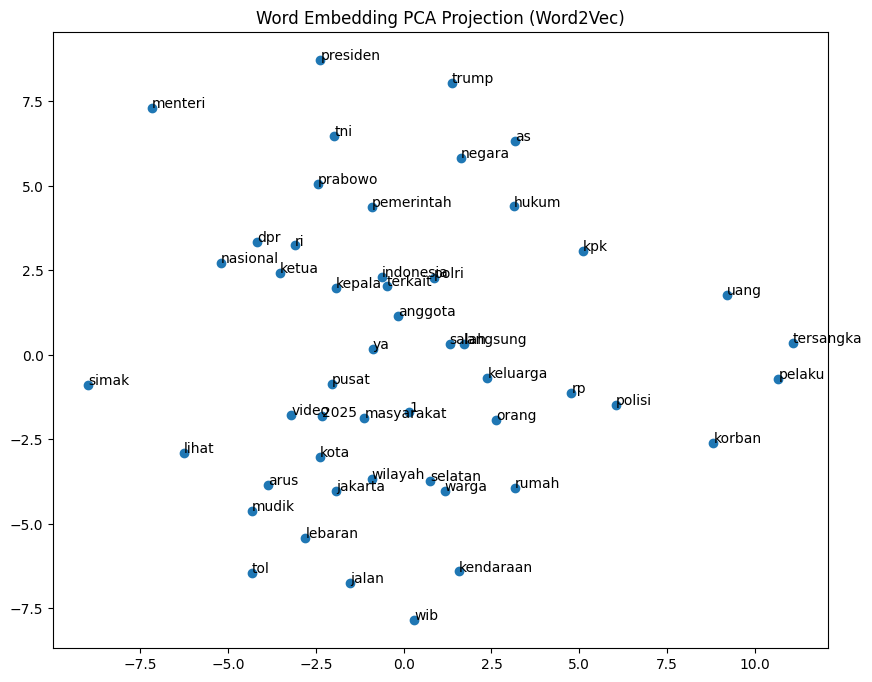

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

model = Word2Vec(df["tokens"], vector_size=100, window=5, min_count=5, workers=4)

top_words = [w for w, _ in Counter(all_tokens).most_common(50) if w in model.wv]

X = model.wv[top_words]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1])
for i, word in enumerate(top_words):
    plt.annotate(word, (coords[i, 0], coords[i, 1]))
plt.title("Word Embedding PCA Projection (Word2Vec)")
plt.show()


In [67]:
hoax_df = pd.read_csv("hoax_news.csv")
hoax_df.head(10)

print(hoax_df["Title"][50])

“Resmi! PSSI Putuskan Piala AFF Tidak Masuk Lagi Kalender Timnas Indonesia”


Total hoax articles: 5379
Columns: ['Title', 'Narasi', 'Penjelasan', 'category']

Missing values per column:
Title         0
Narasi        0
Penjelasan    0
category      0
dtype: int64

After dropping nulls: 5379

Duplicate Narasi rows: 31

Title length stats:
 count    5348.000000
mean        9.212229
std         3.623122
min         2.000000
25%         7.000000
50%         9.000000
75%        11.000000
max        35.000000
Name: title_length, dtype: float64

Narasi length stats:
 count    5348.000000
mean       51.968212
std        64.357998
min         1.000000
25%        18.000000
50%        32.000000
75%        61.000000
max      1300.000000
Name: narasi_length, dtype: float64

Penjelasan length stats:
 count    5348.00000
mean      215.24813
std       145.42395
min         6.00000
25%       138.00000
50%       180.00000
75%       244.25000
max      3295.00000
Name: penjelasan_length, dtype: float64


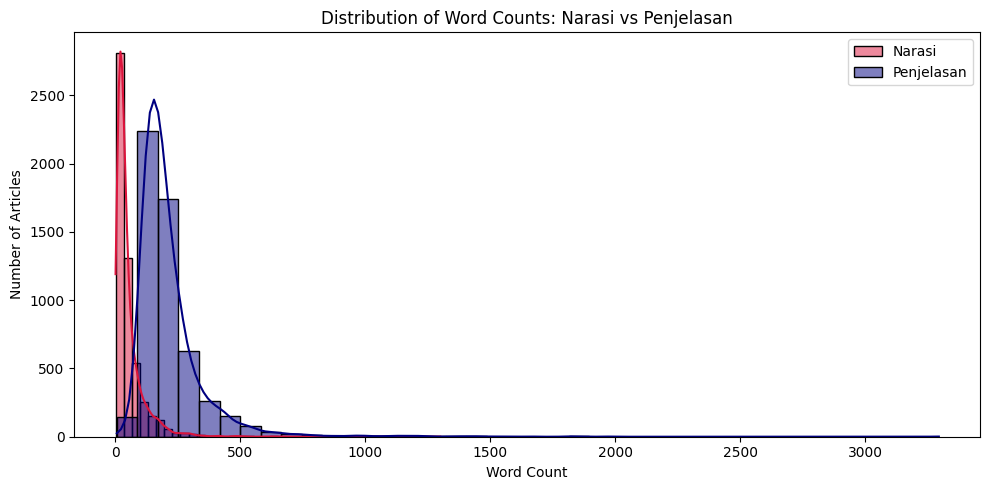

[nltk_data] Downloading package stopwords to C:\Users\WILLIAM S
[nltk_data]     L\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


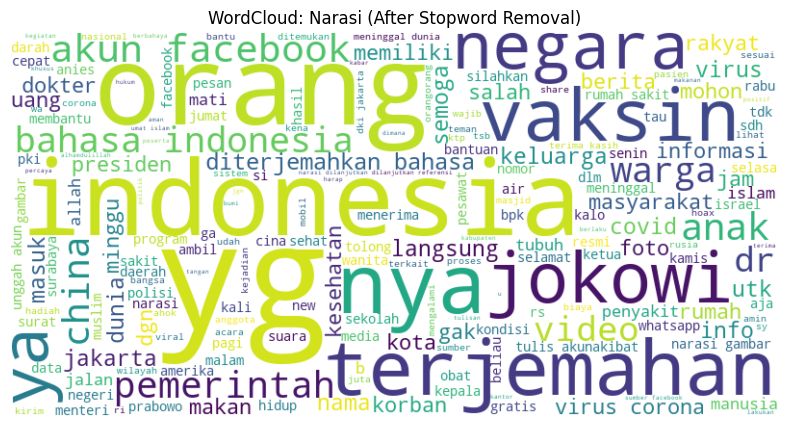

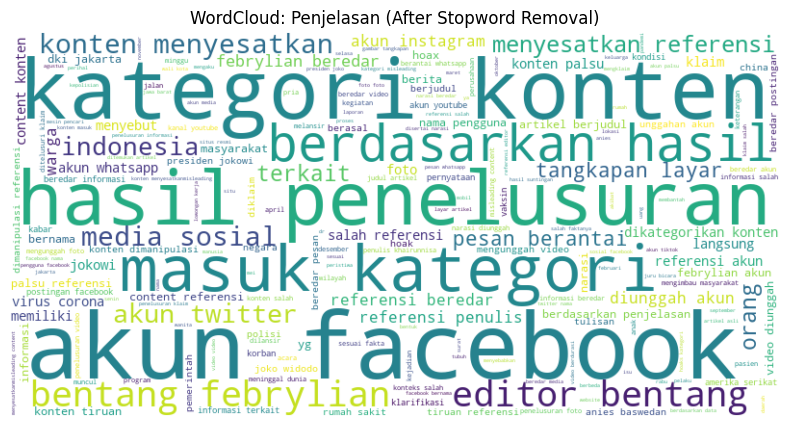

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter

hoax_df = pd.read_csv("hoax_news.csv")

print("Total hoax articles:", len(hoax_df))
print("Columns:", hoax_df.columns.tolist())
print("\nMissing values per column:")
print(hoax_df.isna().sum())

hoax_df.dropna(subset=["Title", "Narasi", "Penjelasan", "category"], inplace=True)
print("\nAfter dropping nulls:", len(hoax_df))

hoax_df["category"] = hoax_df["category"].str.upper().str.strip()

dupes = hoax_df.duplicated(subset="Narasi").sum()
print(f"\nDuplicate Narasi rows: {dupes}")
hoax_df.drop_duplicates(subset="Narasi", inplace=True)

hoax_df["title_length"]      = hoax_df["Title"].apply(lambda t: len(str(t).split()))
hoax_df["narasi_length"]     = hoax_df["Narasi"].apply(lambda t: len(str(t).split()))
hoax_df["penjelasan_length"] = hoax_df["Penjelasan"].apply(lambda t: len(str(t).split()))

print("\nTitle length stats:\n", hoax_df["title_length"].describe())
print("\nNarasi length stats:\n", hoax_df["narasi_length"].describe())
print("\nPenjelasan length stats:\n", hoax_df["penjelasan_length"].describe())


plt.figure(figsize=(10,5))
sns.histplot(hoax_df["narasi_length"], bins=40, kde=True, label="Narasi", color="crimson")
sns.histplot(hoax_df["penjelasan_length"], bins=40, kde=True, label="Penjelasan", color="navy")
plt.title("Distribution of Word Counts: Narasi vs Penjelasan")
plt.xlabel("Word Count")
plt.ylabel("Number of Articles")
plt.legend()
plt.tight_layout()
plt.show()

nltk.download("stopwords")
ind_stop = stopwords.words("indonesian")
en_stop = stopwords.words("english")
stop_words = set(ind_stop + en_stop)

def tokenize(text):
    text = str(text).lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = text.split()
    return [w for w in tokens if w not in stop_words and w.isalpha()]

hoax_df["narasi_tokens"]     = hoax_df["Narasi"].apply(tokenize)
hoax_df["penjelasan_tokens"] = hoax_df["Penjelasan"].apply(tokenize)

narasi_corpus = " ".join([tok for toks in hoax_df["narasi_tokens"] for tok in toks])
penjelasan_corpus = " ".join([tok for toks in hoax_df["penjelasan_tokens"] for tok in toks])

wc_narasi = WordCloud(
    width=800, height=400, background_color="white"
).generate(narasi_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wc_narasi, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud: Narasi (After Stopword Removal)")
plt.show()

wc_penjelasan = WordCloud(
    width=800, height=400, background_color="white"
).generate(penjelasan_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wc_penjelasan, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud: Penjelasan (After Stopword Removal)")
plt.show()
